In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r"D:\EDA\archive\tested.csv")

#  1. Survival Rate by Gender and Class

<Axes: title={'center': 'Survival Rate by Gender and Class'}, xlabel='Sex'>

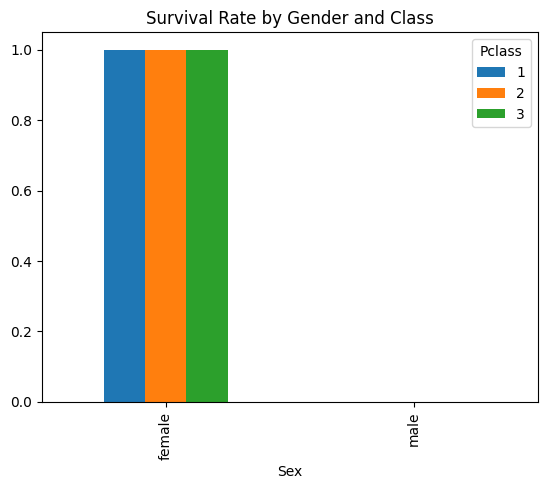

In [40]:
df.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean').plot(kind='bar', title='Survival Rate by Gender and Class')

# 2. Impact of Family Size on Surviva

<Axes: title={'center': 'Survival Rate by Family Size'}, xlabel='FamilySize'>

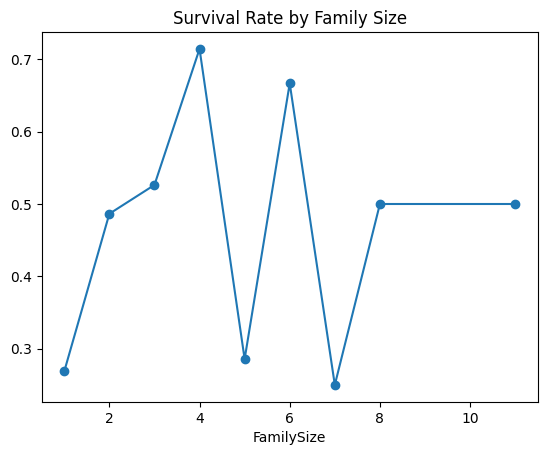

In [41]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.groupby('FamilySize')['Survived'].mean().plot(kind='line', marker='o', title='Survival Rate by Family Size')


#  3. Survival by Fare Ranges

C:\Users\jayad\AppData\Local\Temp\ipykernel_23320\1495505159.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('FareBin')['Survived'].mean().plot(kind='bar', title='Survival Rate by Fare Quartiles')


<Axes: title={'center': 'Survival Rate by Fare Quartiles'}, xlabel='FareBin'>

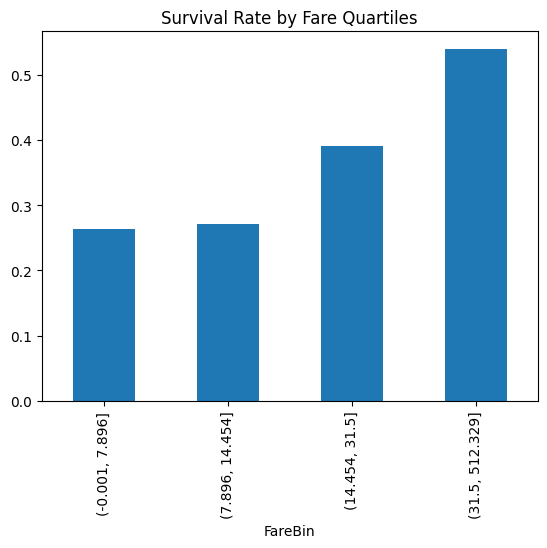

In [42]:

df['FareBin'] = pd.qcut(df['Fare'], 4)
df.groupby('FareBin')['Survived'].mean().plot(kind='bar', title='Survival Rate by Fare Quartiles')


# 4. Age Distribution: Survivors vs Non-survivors

<Axes: title={'center': 'Age Distribution by Survival'}, ylabel='Density'>

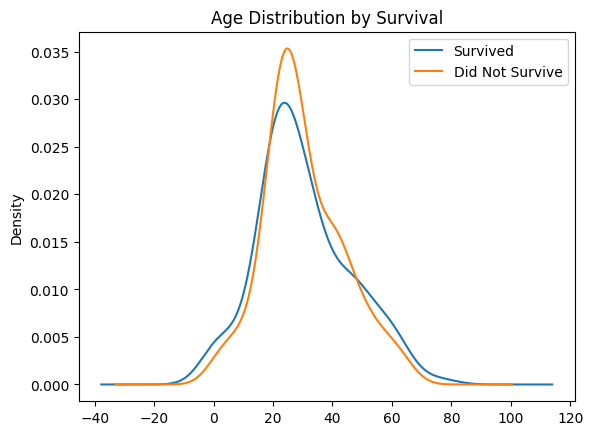

In [43]:
df[df['Survived'] == 1]['Age'].plot(kind='kde', label='Survived', legend=True)
df[df['Survived'] == 0]['Age'].plot(kind='kde', label='Did Not Survive', legend=True, title='Age Distribution by Survival')

# 5. Correlation Heatmap

<Axes: >

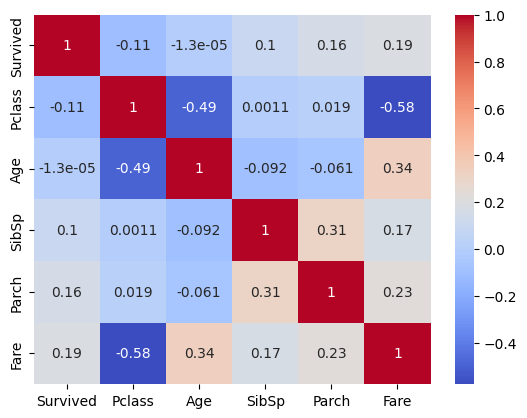

In [44]:

sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), annot=True, cmap='coolwarm')


# 6. Gender Distribution

<Axes: title={'center': 'Gender Distribution'}, xlabel='Sex'>

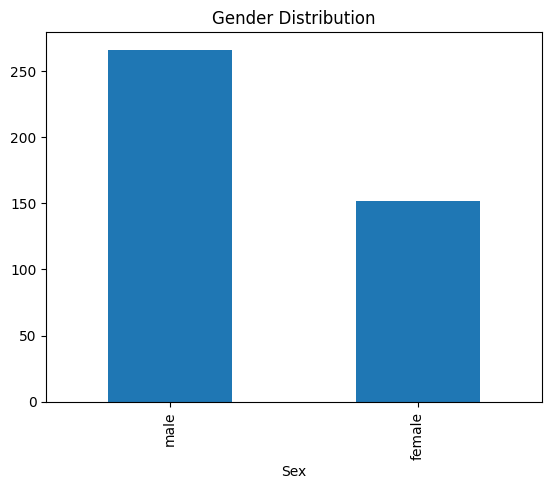

In [45]:

df['Sex'].value_counts().plot(kind='bar', title='Gender Distribution')


# 7. Most at-risk group (lowest survival rate)

In [46]:
risk_group = df.groupby(['Sex', 'Pclass'])['Survived'].mean().sort_values()
print("Lowest survival rates:\n", risk_group.head())

Lowest survival rates:
 Sex     Pclass
male    1         0.0
        2         0.0
        3         0.0
female  1         1.0
        3         1.0
Name: Survived, dtype: float64


# 8. Survival by Gender

<Axes: title={'center': 'Survival Rate by Gender'}, xlabel='Sex'>

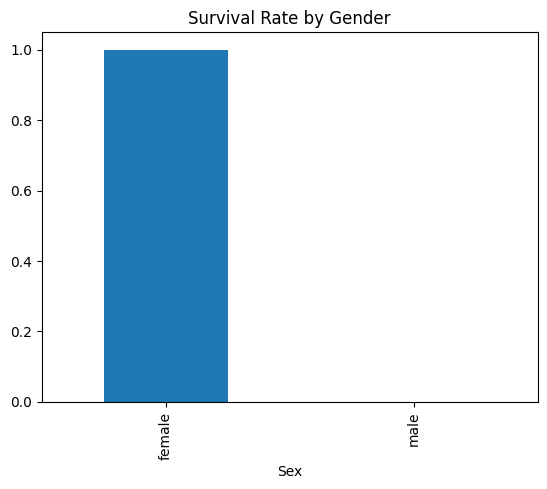

In [47]:

df.groupby('Sex')['Survived'].mean().plot(kind='bar', title='Survival Rate by Gender')


# 9. Children vs Adults Survival

<Axes: title={'center': 'Survival Rate: Children vs Adults'}, xlabel='Child'>

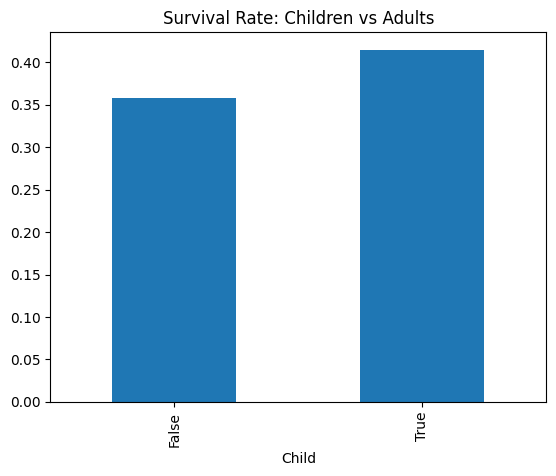

In [48]:

df['Child'] = df['Age'] < 18
df.groupby('Child')['Survived'].mean().plot(kind='bar', title='Survival Rate: Children vs Adults')


# 10. Survival Rate per Class

<Axes: title={'center': 'Survival Rate by Class'}, xlabel='Pclass'>

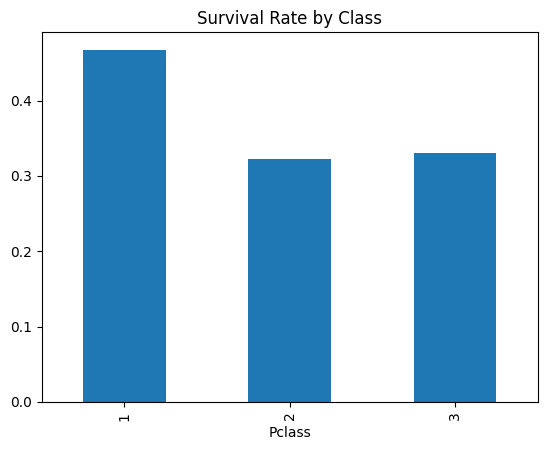

In [49]:

df.groupby('Pclass')['Survived'].mean().plot(kind='bar', title='Survival Rate by Class')


# 11. Class by Gender

<Axes: title={'center': 'Class by Gender'}, xlabel='Pclass'>

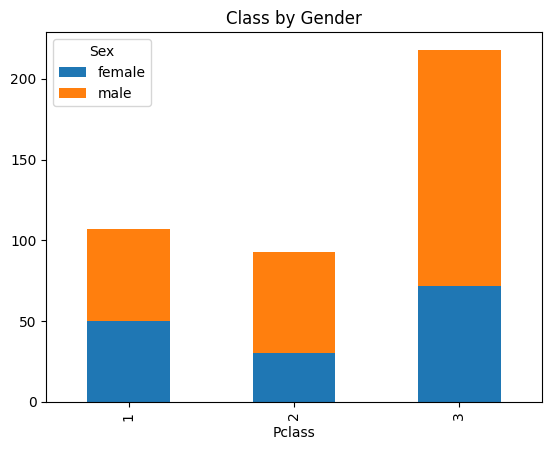

In [50]:

pd.crosstab(df['Pclass'], df['Sex']).plot(kind='bar', stacked=True, title='Class by Gender')


# 12. 1st Class Survival Rate

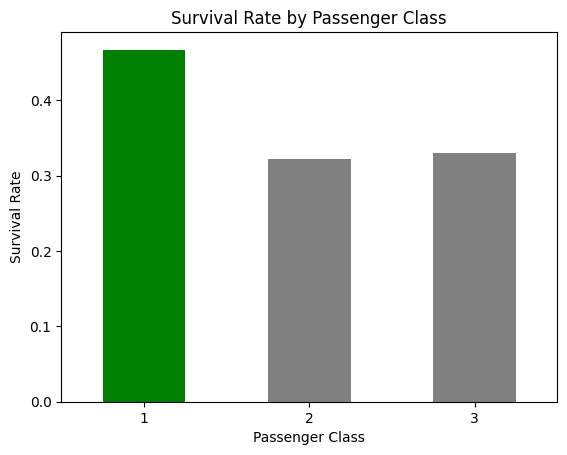

In [51]:
survival_rates = df.groupby('Pclass')['Survived'].mean()
colors = ['green' if cls == 1 else 'gray' for cls in survival_rates.index]
survival_rates.plot(kind='bar', color=colors)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.xticks(rotation=0)
plt.show()



# 13. Alone vs Family Survival

<Axes: title={'center': 'Survival Rate: Alone vs With Family'}, xlabel='Alone'>

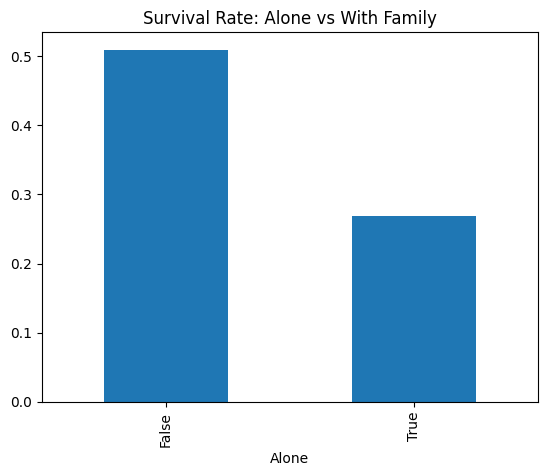

In [52]:

df['FamilySize'] = df['SibSp'] + df['Parch']
df['Alone'] = df['FamilySize'] == 0
df.groupby('Alone')['Survived'].mean().plot(kind='bar', title='Survival Rate: Alone vs With Family')


# 14. Passengers by Embarkation Port

<Axes: title={'center': 'Embarkation Port Distribution'}, xlabel='Embarked'>

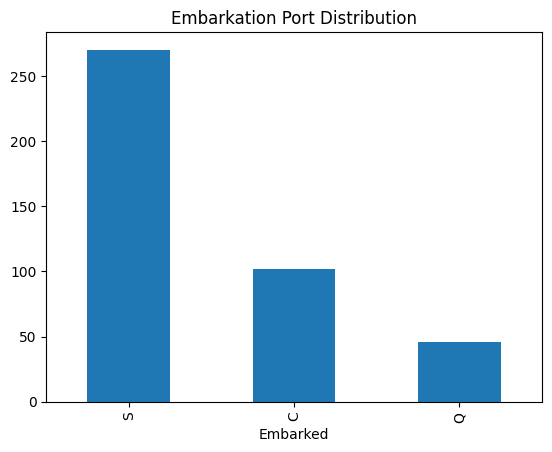

In [53]:

df['Embarked'].value_counts().plot(kind='bar', title='Embarkation Port Distribution')


# 15. Survival by Embarkation Port

<Axes: title={'center': 'Survival Rate by Embarkation Port'}, xlabel='Embarked'>

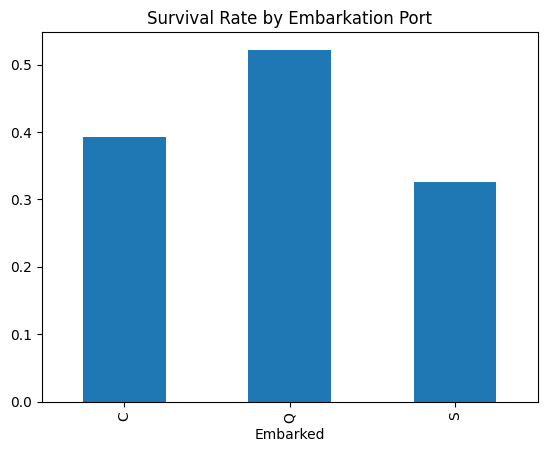

In [54]:

df.groupby('Embarked')['Survived'].mean().plot(kind='bar', title='Survival Rate by Embarkation Port')


# 16. Fare Distribution

<Axes: >

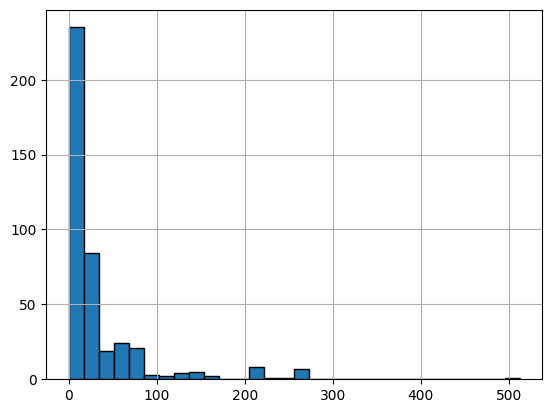

In [55]:

df['Fare'].hist(bins=30, edgecolor='black')
